In [73]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import maad
from maad import sound, features, rois
from maad.util import (
    date_parser, plot_correlation_map,
    plot_features_map, plot_features, false_Color_Spectro
    )

In [11]:
s, fs = sound.load('AMBForst_Forest (ID 0100)_BSB.wav')

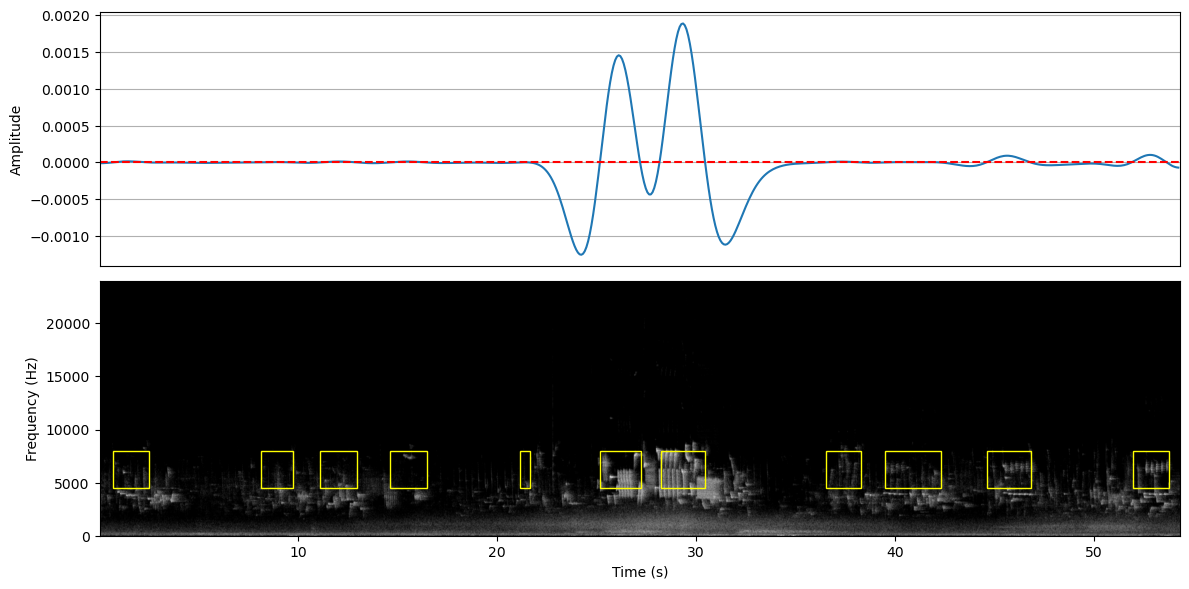

,min_f,min_t,max_f,max_t
0,4500.0,0.68267,8000.0,2.47467
1,4500.0,8.10667,8000.0,9.72800
2,4500.0,11.09333,8000.0,12.97067
3,4500.0,14.59200,8000.0,16.46933
4,4500.0,21.16267,8000.0,21.67467
5,4500.0,25.17333,8000.0,27.22133
6,4500.0,28.24533,8000.0,30.46400
7,4500.0,36.52267,8000.0,38.31467
8,4500.0,39.50933,8000.0,42.32533
9,4500.0,44.62933,8000.0,46.84800


In [19]:
rois.find_rois_cwt(s, fs, flims=(4500,8000), tlen=2, th=0, display=True)

In [23]:
# Computer Energy signal (loudness)
E1 = sum(s**2)
maad.util.power2dB(E1)

26.92532370459499

In [25]:
N = 4096
Sxx_power,tn,fn,ext = maad.sound.spectrogram (s, fs, nperseg=N, noverlap=N//2, mode = 'psd')   

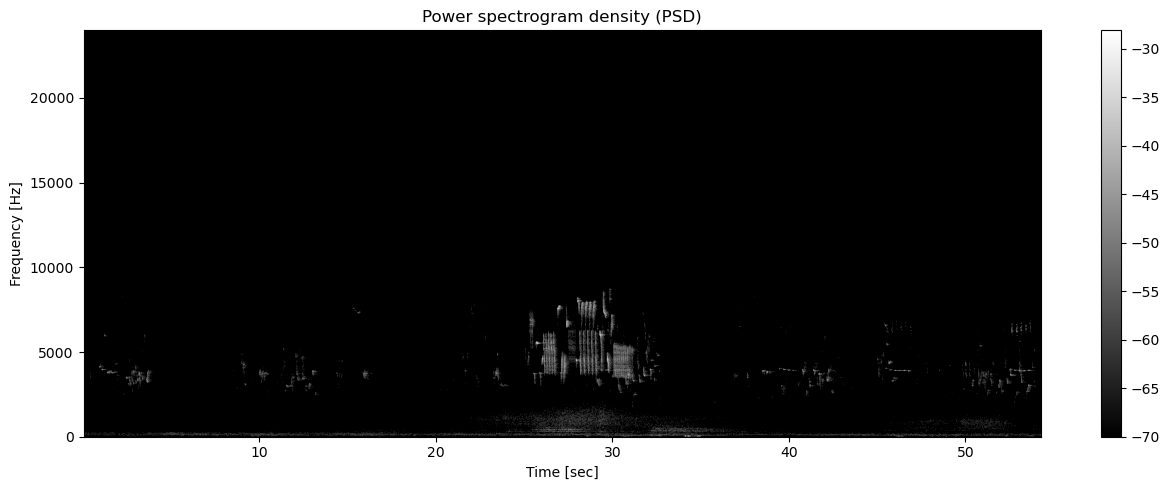

In [27]:
Sxx_dB = maad.util.power2dB(Sxx_power) # convert into dB
fig_kwargs = {'vmax': Sxx_dB.max(),
                  'vmin':-70,
                  'extent':ext,
                  'figsize':(4,13),
                  'title':'Power spectrogram density (PSD)',
                  'xlabel':'Time [sec]',
                  'ylabel':'Frequency [Hz]',
                  }
fig, ax = maad.util.plot2d(Sxx_dB,**fig_kwargs)

In [45]:
#Compute mean power spectrogram
S_power_mean = maad.sound.avg_power_spectro(Sxx_power)
S_power_mean.mean()

9.253416397873579e-08

In [43]:
#Compute mean amplitude spectrogram
Sxx_amplitude,tn, fn, ext = maad.sound.spectrogram (s, fs, mode="amplitude")
S_amplitude_mean = maad.sound.avg_amplitude_spectro(Sxx_amplitude)
S_amplitude_mean.mean()

0.0003328894093105714

COMPUTERING ACOUSTIC INDEXES

In [47]:
# Temporal entropy
Ht = maad.features.temporal_entropy (s)
print(Ht) 

0.8388491559652274


The entropy of an audio signal is a measure of energy dispersion. In the temporal domain, values below 0.7 indicate a brief concentration of energy (few miliseconds), while values close 1 indicate low concentration of energy, no peaks, smooth and constant background noise.

In [55]:
# acoustic_richness_index
Ht_10h00 = maad.features.temporal_entropy(s)
M_10h00 = maad.features.temporal_median(s)

result = maad.features.acoustic_richness_index([Ht_10h00],[M_10h00]) 
print(result)

[1.]


In [57]:
# Tamporal Activity
ACTfract, ACTcount, ACTmean = maad.features.temporal_activity (s, 6)
print('ACTfract: %2.2f / ACTcount: %2.0f / ACTmean: %2.2f' % (ACTfract, ACTcount, ACTmean))

ACTfract: 0.16 / ACTcount: 834 / ACTmean: 13.50


In [59]:
# Temporal Event
EVNtFract, EVNmean, EVNcount, _ = maad.features.temporal_events (s, fs, 6)
print('EVNtFract: %2.2f / EVNmean: %2.2f / EVNcount: %2.0f' % (EVNtFract, EVNmean, EVNcount))

EVNtFract: 0.16 / EVNmean: 0.07 / EVNcount:  2


In [61]:
# acoustic_complexity_index
Sxx, tn, fn, ext = maad.sound.spectrogram (s, fs, mode='amplitude')  
_, _ , ACI  = maad.features.acoustic_complexity_index(Sxx)
print('ACI : %2.0f ' %ACI)

ACI : 305 


ACI depends on the duration of the spectrogram as the derivation of the signal is normalized by the sum of the signal. Thus, if the background noise is high due to high acoustic activity the normalization by the sum of the signal reduced ACI. So ACI is low when there is no acoustic activity or high acoustic activity with continuous background noise. ACI is high only when acoustic activity is medium, with sounds well above the background noise.

In [64]:
# Frequency_entropy
Sxx_power,_,_,_ = maad.sound.spectrogram (s, fs)   
Hf, Ht_per_bin = maad.features.frequency_entropy(Sxx_power)
print(Hf)

0.7619202019710691


In [66]:
print('Length of Ht_per_bin is : %2.0f' % len(Ht_per_bin))

Length of Ht_per_bin is : 512


The spectral entropy of a signal measures the energy dispersion along frequencies. Low values indicates a concentration of energy around a narrow frequency band. If the DC value is not removed before processing the large peak at f=0Hz will lower the entropy of the signal.

45

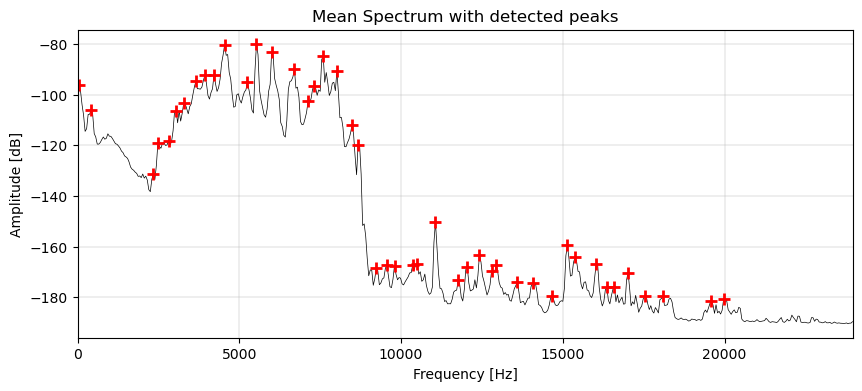

In [69]:
# number_of_peaks
Sxx_power, tn, fn, _ = maad.sound.spectrogram (s, fs)  
maad.features.number_of_peaks(Sxx_power, fn, slopes=6, min_freq_dist=100, display=True)

In [71]:
#spectral_entropy
Sxx_power, tn, fn, _ = maad.sound.spectrogram (s, fs)  
EAS, ECU, ECV, EPS, EPS_KURT, EPS_SKEW = maad.features.spectral_entropy(Sxx_power, fn, flim=(2000,10000)) 
print('EAS: %2.2f / ECU: %2.2f / ECV: %2.2f / EPS: %2.2f / EPS_KURT: %2.2f / EPS_SKEW: %2.2f' % (EAS, ECU, ECV, EPS, EPS_KURT, EPS_SKEW))

EAS: 0.12 / ECU: 0.36 / ECV: 0.22 / EPS: 0.13 / EPS_KURT: 9.91 / EPS_SKEW: 2.24


Mean proportion of spectrogram above threshold : 0.10%


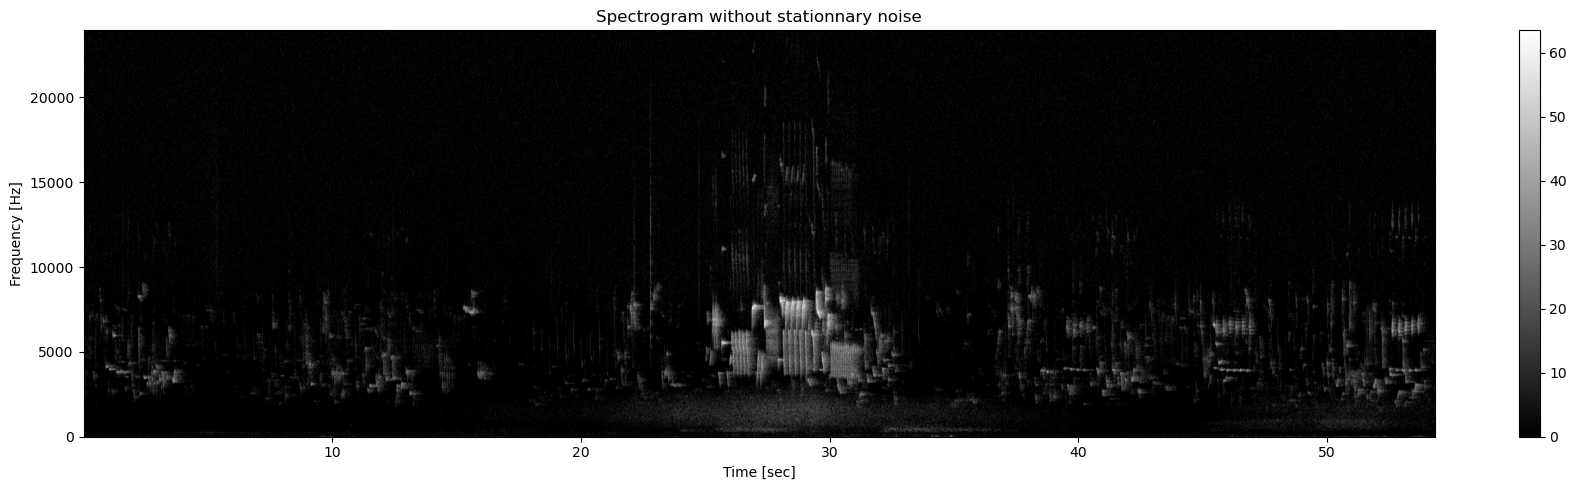

In [75]:
# spectral_activity
Sxx_power, tn, fn, ext = maad.sound.spectrogram (s, fs)  
Sxx_noNoise= maad.sound.median_equalizer(Sxx_power, display=True, extent=ext) 
Sxx_dB_noNoise = maad.util.power2dB(Sxx_noNoise)
ACTspfract_per_bin, ACTspcount_per_bin, ACTspmean_per_bin = maad.features.spectral_activity(Sxx_dB_noNoise)  
print('Mean proportion of spectrogram above threshold : %2.2f%%' %np.mean(ACTspfract_per_bin))

Mean proportion of spectrogram with events: 0.03%


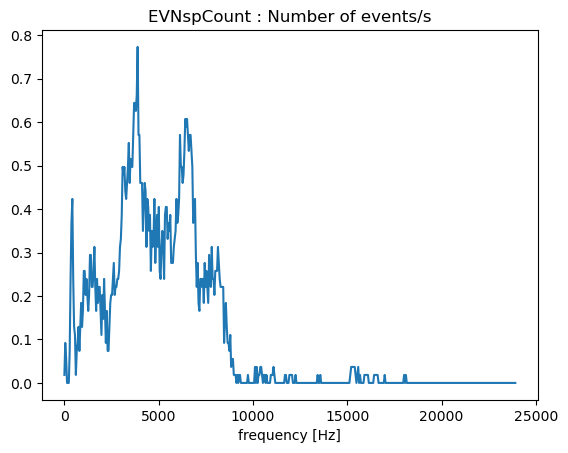

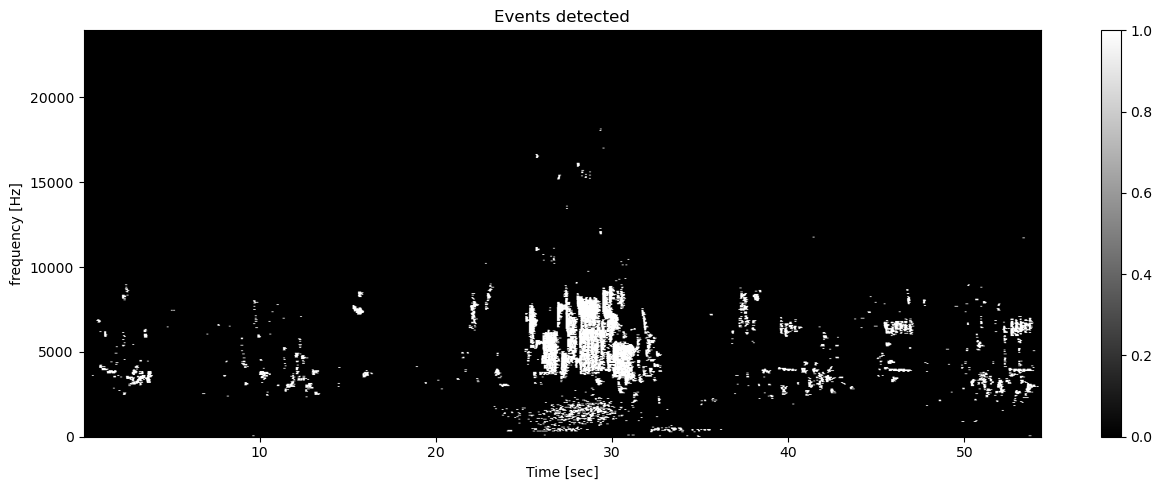

In [77]:
# spectral_events
Sxx_power, tn, fn, ext = maad.sound.spectrogram (s, fs)  
Sxx_noNoise= maad.sound.median_equalizer(Sxx_power) 
Sxx_dB_noNoise = maad.util.power2dB(Sxx_noNoise)
EVNspFract_per_bin, EVNspMean_per_bin, EVNspCount_per_bin, EVNsp = maad.features.spectral_events(Sxx_dB_noNoise, dt=tn[1]-tn[0], dB_threshold=6, rejectDuration=0.1, display=True, extent=ext)  
print('Mean proportion of spectrogram with events: %2.2f%%' %np.mean(EVNspFract_per_bin)) 

LFC: 0.23 / MFC: 0.27 / HFC: 0.14


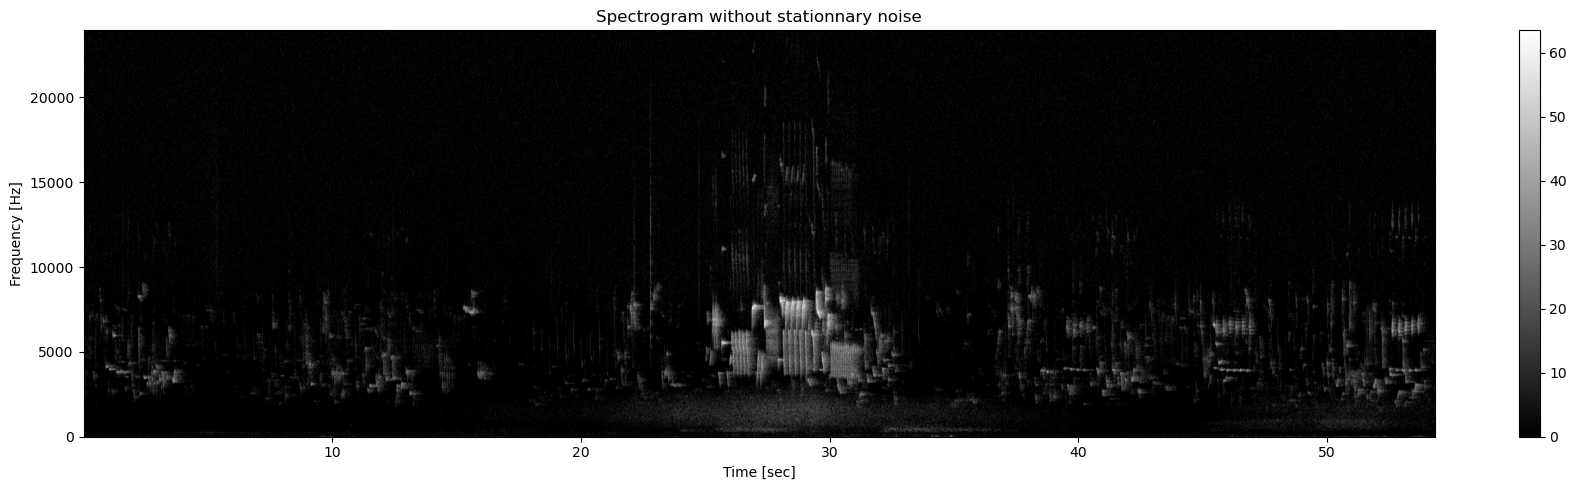

In [79]:
#spectral_cover
Sxx_power, tn, fn, ext = maad.sound.spectrogram (s, fs)  
Sxx_noNoise= maad.sound.median_equalizer(Sxx_power, display=True, extent=ext) 
Sxx_dB_noNoise = maad.util.power2dB(Sxx_noNoise)
LFC, MFC, HFC = maad.features.spectral_cover(Sxx_dB_noNoise, fn) 
print('LFC: %2.2f / MFC: %2.2f / HFC: %2.2f' % (LFC, MFC, HFC))

In [81]:
# soundscape_index
Sxx_power, tn, fn, ext = maad.sound.spectrogram (s, fs)  
NDSI, ratioBA, antroPh, bioPh  = maad.features.soundscape_index(Sxx_power,fn)
print('NDSI Soundecology : %2.2f ' %NDSI)
NDSI, ratioBA, antroPh, bioPh  = maad.features.soundscape_index(Sxx_power,fn,R_compatible=None)
print('NDSI MAAD: %2.2f ' %NDSI)

NDSI Soundecology : 0.67 
NDSI MAAD: 0.94 


In [83]:
# bioacoustics_index
Sxx, tn, fn, ext = maad.sound.spectrogram (s, fs,mode='amplitude')  
BI = maad.features.bioacoustics_index(Sxx,fn)
print('BI Soundecology : %2.2f ' %BI)
BI  = maad.features.bioacoustics_index(Sxx,fn,R_compatible=None)
print('BI MAAD : %2.2f ' %BI) 

BI Soundecology : 78.64 
BI MAAD : 8.77 


In [85]:
# acoustic_diversity_index
Sxx, tn, fn, ext = maad.sound.spectrogram (s, fs, nperseg=int(fs/10), noverlap=0, mode='amplitude', detrend=False) 
ADI  = maad.features.acoustic_diversity_index(Sxx,fn,fmax=10000)
print('ADI : %2.2f ' %ADI)

Sxx, tn, fn, ext = maad.sound.spectrogram (s, fs, mode='amplitude')   
ADI  = maad.features.acoustic_diversity_index(Sxx,fn,fmax=10000, dB_threshold = -47)
print('ADI : %2.2f ' %ADI)

ADI : 1.92 
ADI : 1.87 


In [87]:
#acoustic_eveness_index
Sxx, tn, fn, ext = maad.sound.spectrogram (s, fs, nperseg=int(fs/10), noverlap=0, mode='amplitude', detrend=False)   
AEI  = maad.features.acoustic_eveness_index(Sxx,fn,fmax=10000)
print('AEI : %2.2f ' %AEI) 

Sxx, tn, fn, ext = maad.sound.spectrogram (s, fs, mode='amplitude')   
AEI  = maad.features.acoustic_eveness_index(Sxx,fn,fmax=10000, dB_threshold = -47)
print('AEI : %2.2f ' %AEI)

AEI : 0.47 
AEI : 0.51 


The Acoustic Eveness Index (AEI) and the Acoustic Diversity Index (ADI) are negatively correlated.

In [90]:
# roughness maad.features.roughness(x, norm=None, axis=0)

In [92]:
# temporal_leq 
# Computes the Equivalent Continuous Sound level (Leq) of an audio signal in the time domain.
Leq = maad.features.temporal_leq (s, fs, gain=42)
print('Leq is %2.1fdB SPL' % Leq) 

Leq is 55.8dB SPL


In [94]:
# spectral_leq 
#Computes the Equivalent Continuous Sound level (Leq) from a power spectrum (1d) or power spectrogram (2d).
Sxx_power,_,_,_ = maad.sound.spectrogram(s,fs)
Leqf, Leqf_per_bin = maad.features.spectral_leq(Sxx_power, gain=42)
print('Leq (from spectrogram) is %2.1fdB SPL' % Leqf) 

Leq (from spectrogram) is 55.8dB SPL


In [96]:
# surface_roughness maad.features.surface_roughness(x, norm='global')
#Surface roughness is quantified by the deviations in the direction of the normal vector of a real surface from its ideal form. 
#If these deviations are large, the surface is rough; if they are small, the surface is smooth

In [98]:
# Time frequency derivation index (tfsd) from a spectrogram
Sxx_power,tn,fn,_ = maad.sound.spectrogram(s,fs)
maad.features.tfsd(Sxx_power,fn, tn)

0.46395437898273506

The TFSD varies between 0 and 1, where 1 indicates sound events on the full spectrogram. When flim=(2000,8000), TFSD mostly indicates the presence of birds in the signal When flim=(0,1000), TFSD mostly indicates the presence of human voice in the signal When log=False and flim=(2000,8000), a TFSD > 0.3 indicates the presence of birds in the signal. Default flim value (2000,8000).

reference : Gontier, F., Lavandier, C., Aumond, P., Lagrange, M., & Petiot, J. F. (2019). Estimation of the perceived time of presence of sources in urban acoustic environments using deep learning techniques. Acta Acustica united with Acustica.`DOI: 10.3813/AAA.919384 <https://doi.org/10.3813/AAA.919384>

In [102]:
# more_entropy 
# Compute entropy in time domain
env = maad.sound.envelope(s)
Ht_Havrda, Ht_Renyi, Ht_pairedShannon, Ht_gamma, Ht_GiniSimpson = maad.features.more_entropy(env**2, order=3)
print('Ht_Havrda: %2.2f / Ht_Renyi: %2.2f / Ht_pairedShannon: %2.2f / Ht_gamma: %2.0f / Ht_GiniSimpson: %2.2f' % (Ht_Havrda, Ht_Renyi, Ht_pairedShannon, Ht_gamma, Ht_GiniSimpson))

Ht_Havrda: 0.33 / Ht_Renyi: 8.46 / Ht_pairedShannon: 10.76 / Ht_gamma: 779590602 / Ht_GiniSimpson: 1.00


In [104]:
# more_entropy
# Compute entropy in spectral domain
Sxx_power,_,_,_ = maad.sound.spectrogram(s,fs)
S_power = maad.sound.avg_power_spectro(Sxx_power)
Hf_Havrda, Hf_Renyi, Hf_pairedShannon, Hf_gamma, Hf_GiniSimpson = maad.features.more_entropy(S_power, order=3)
print('Hf_Havrda: %2.2f / Hf_Renyi: %2.2f / Hf_pairedShannon: %2.2f / Hf_gamma: %2.0f / Hf_GiniSimpson: %2.2f' % (Hf_Havrda, Hf_Renyi, Hf_pairedShannon, Hf_gamma, Hf_GiniSimpson)) 

Hf_Havrda: 0.33 / Hf_Renyi: 4.25 / Hf_pairedShannon: 5.75 / Hf_gamma: 11820 / Hf_GiniSimpson: 0.99


In [106]:
# acoustic_gradient_index 
Sxx_power,tn,fn,_ = maad.sound.spectrogram(s,fs)
_, _, AGI_mean, _ = maad.features.acoustic_gradient_index(Sxx_power,tn[1]-tn[0])
AGI_mean 

62.43486192384567

Compute the Acoustic Gradient Index (AGI) from a raw spectrogram. This index must be computed on a raw spectrogram (background noise must remain).

In [109]:
# frequency_raoq
# Compute Rao’s quadratic entropy on a power spectrum (1d)
Sxx_power,tn,fn,_ = maad.sound.spectrogram(s,fs)
S_power = maad.sound.avg_power_spectro(Sxx_power) 
maad.features.frequency_raoq(S_power, fn)

0.289960432269751

C:\Users\vainq\anaconda3\Lib\site-packages\maad\util\miscellaneous.py:880: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   6   6  10  10  13  18  18  19  22  23  33  34  36  37  38  39  39
  40  40  40  41  42  44  45  45  46  46  46  46  48  48  49  50  50  50
  50  50  52  53  53  54  54  55  55  55  55  56  56  56  56  57  58  59
  59  60  60  60  61  61  61  61  62  62  62  63  63  63  63  63  64  64
  64  65  66  66  67  69  69  70  71  71  72  73  73  73  75  75  77  78
  79  79  81  82  83  84  84  84  85  85  87  88  89  90  90  90  92  92
  93  94  94  95  95  95  95  96  97  97  97  97  98  98  99 100 102 102
 102 103 103 104 105 105 105 105 105 106 106 107 107 108 108 108 109 110
 110 110 111 112 112 114 115 116 117 118 118 118 119 119 119 119 120 120
 121 122 122 123 123 124 125 125 127 128 128 129 130 131 131 131 132 132
 133

The total number of ROIs found in the spectrogram is 352
The percentage of spectrogram covered by ROIs is 23%


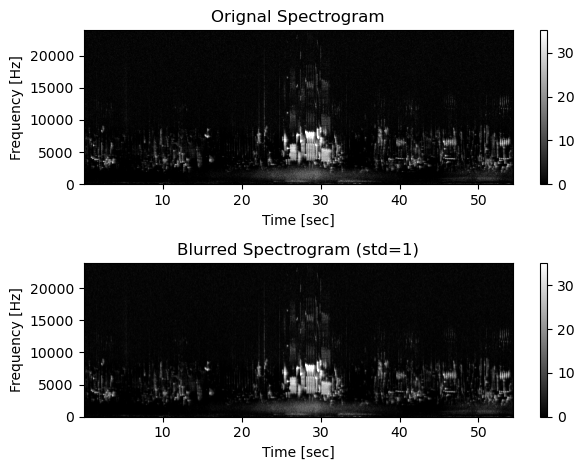

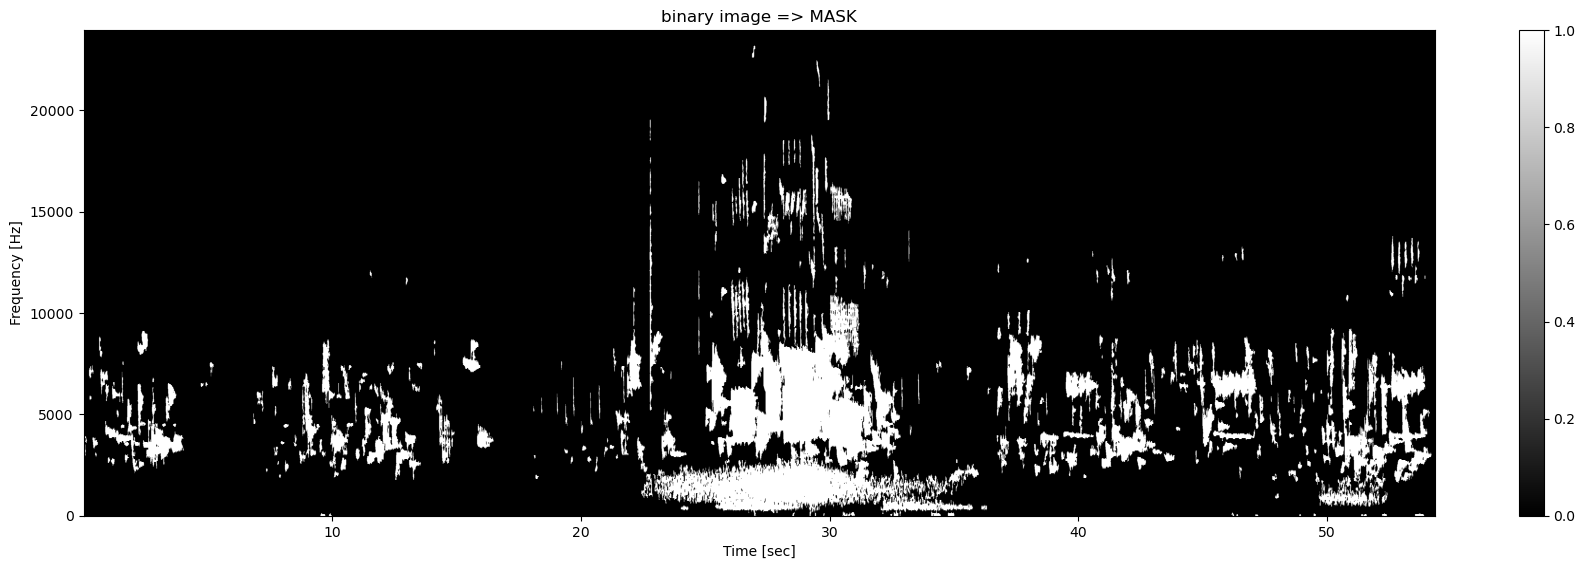

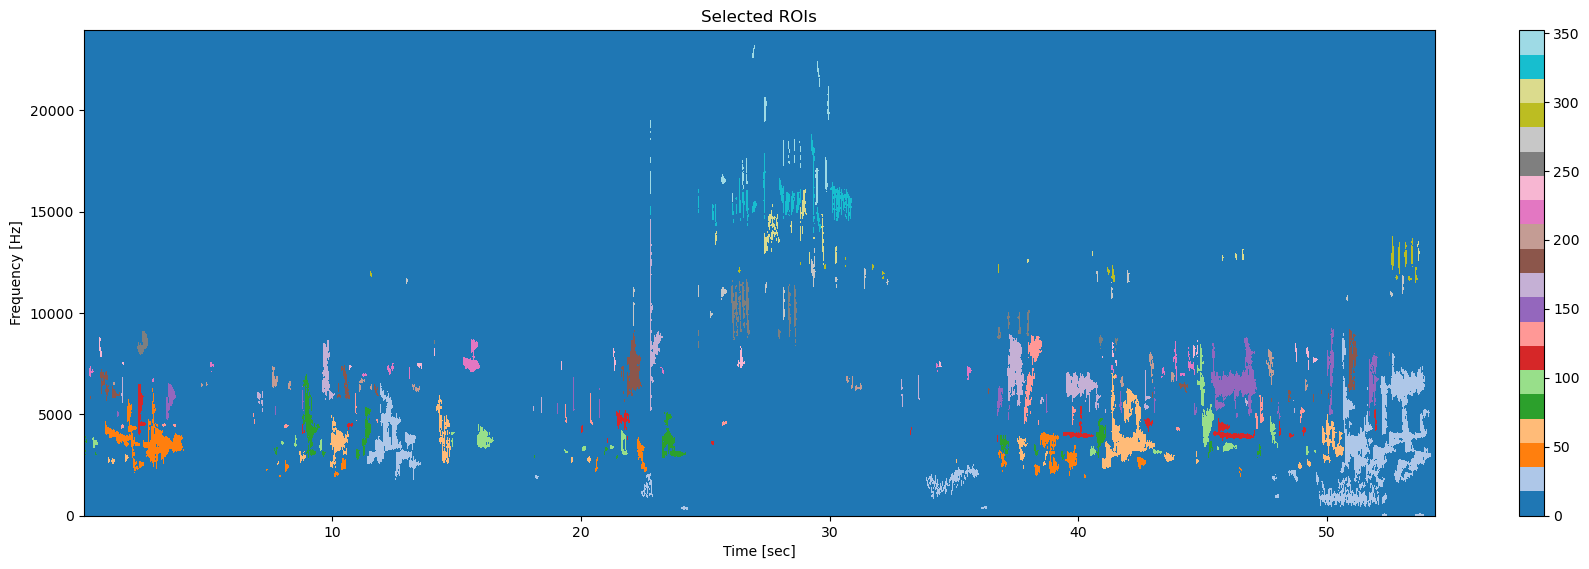

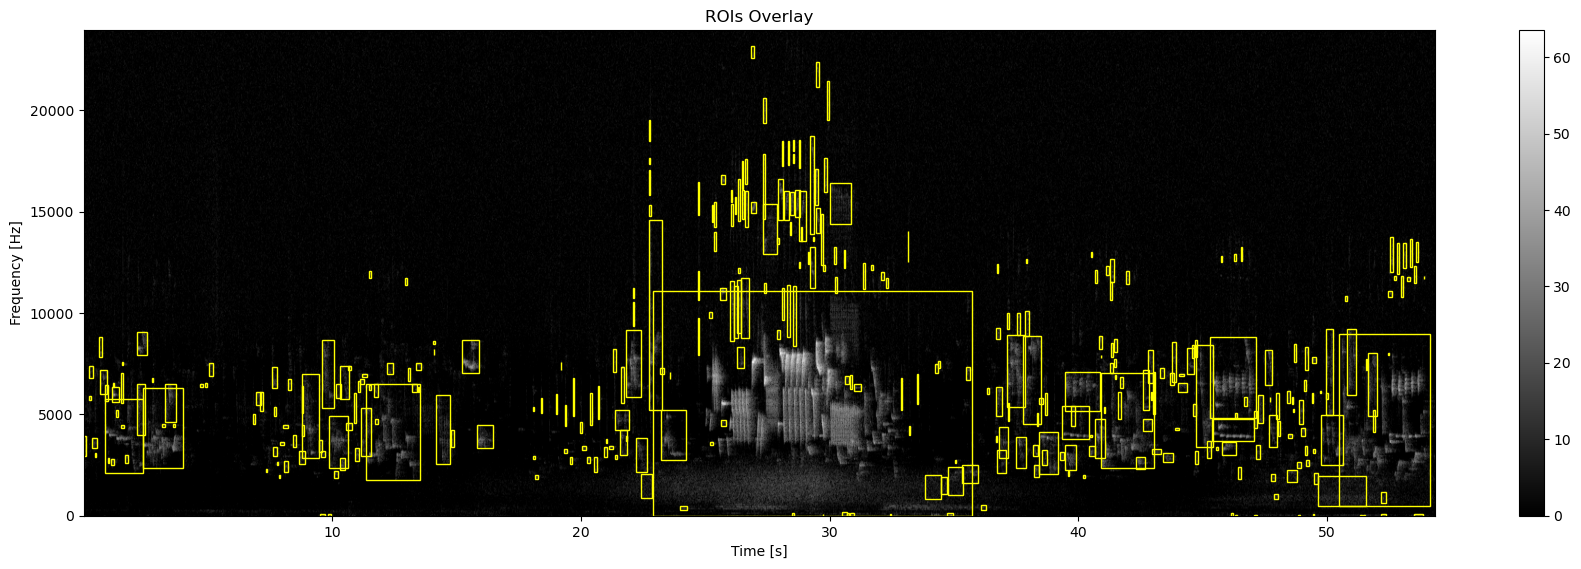

In [111]:
# region_of_interest_index
#Compute an acoustic activity index based on the regions of interested detected on a spectrogram.
#The function first find regions of interest (ROI) and then compute the number or ROIs and the cover area of these ROIS on the spectrogram.

Sxx_power,tn,fn,_ = maad.sound.spectrogram(s,fs)
Sxx_noNoise= maad.sound.median_equalizer(Sxx_power) 
Sxx_dB_noNoise = maad.util.power2dB(Sxx_noNoise)
ROItotal, ROIcover = maad.features.region_of_interest_index(Sxx_dB_noNoise, tn, fn, display=True)
print('The total number of ROIs found in the spectrogram is %2.0f' %ROItotal) 
print('The percentage of spectrogram covered by ROIs is %2.0f%%' %ROIcover)

Total number of ROIs found. The higher is the number of ROI, the higher is the acoustic abondance and/or richness expected
Percentage of spectrogram cover. The higher is the cover percentage, the higher is the acoustic richness expected.

In [116]:
#all_temporal_alpha_indices. Compute 16 temporal domain acoustic indices. 

#This code have to be adaptided to our study case

''' s, fs = maad.sound.load('../data/cold_forest_night.wav')
df_temporal_indices_NIGHT = maad.features.all_temporal_alpha_indices (s,fs)
s, fs = maad.sound.load('../data/cold_forest_daylight.wav')
df_temporal_indices_DAY = maad.features.all_temporal_alpha_indices (s,fs)

variation = abs(df_temporal_indices_DAY - df_temporal_indices_NIGHT)/df_temporal_indices_NIGHT*100
print('LEQt variation night vs day: %2.2f %%' % variation['LEQt'][0]) 
LEQt variation night vs day: 29.66 %
print('Ht variation night vs day: %2.2f %%' % variation.Ht.iloc[0]) 
Ht variation night vs day: 2.33 %
print('MEANt variation night vs day: %2.2f %%' % variation['MEANt'][0]) 
MEANt variation night vs day: 299.62 %
print('VARt variation night vs day: %2.2f %%' % variation['VARt'][0]) 
VARt variation night vs day: 1664.02 %
print('EVNtFraction variation night vs day: %2.2f %%' % variation['EVNtFraction'][0]) 
EVNtFraction variation night vs day: 98.48 % '''


" s, fs = maad.sound.load('../data/cold_forest_night.wav')\ndf_temporal_indices_NIGHT = maad.features.all_temporal_alpha_indices (s,fs)\ns, fs = maad.sound.load('../data/cold_forest_daylight.wav')\ndf_temporal_indices_DAY = maad.features.all_temporal_alpha_indices (s,fs)\n\nvariation = abs(df_temporal_indices_DAY - df_temporal_indices_NIGHT)/df_temporal_indices_NIGHT*100\nprint('LEQt variation night vs day: %2.2f %%' % variation['LEQt'][0]) \nLEQt variation night vs day: 29.66 %\nprint('Ht variation night vs day: %2.2f %%' % variation.Ht.iloc[0]) \nHt variation night vs day: 2.33 %\nprint('MEANt variation night vs day: %2.2f %%' % variation['MEANt'][0]) \nMEANt variation night vs day: 299.62 %\nprint('VARt variation night vs day: %2.2f %%' % variation['VARt'][0]) \nVARt variation night vs day: 1664.02 %\nprint('EVNtFraction variation night vs day: %2.2f %%' % variation['EVNtFraction'][0]) \nEVNtFraction variation night vs day: 98.48 % "

In [120]:
# all_spectral_alpha_indices. Computes the acoustic indices in spectral (spectrum (1d) or spectrogram (2d)) domain.

#This code have to be adaptided to our study case

'''s, fs = maad.sound.load('../data/cold_forest_daylight.wav')
Sxx_power,tn,fn,ext = maad.sound.spectrogram (s, fs)  
df_spectral_indices_DAY, _ = maad.features.all_spectral_alpha_indices(Sxx_power,tn,fn,display=True, extent=ext)
s, fs = maad.sound.load('../data/cold_forest_night.wav')
Sxx_power,tn,fn,ext = maad.sound.spectrogram (s, fs)  
df_spectral_indices_NIGHT, _ = maad.features.all_spectral_alpha_indices(Sxx_power,tn,fn,display=True)

variation = abs(df_spectral_indices_DAY - df_spectral_indices_NIGHT)/df_spectral_indices_NIGHT*100
print('LEQf variation night vs day: %2.2f %%' % variation['LEQf'][0]) 
LEQf variation night vs day: 34.94 %
print('Hf variation night vs day: %2.2f %%' % variation['Hf'][0]) 
Hf variation night vs day: 105.61 %
print('ACI variation night vs day: %2.2f %%' % variation['ACI'][0]) 
ACI variation night vs day: 3.39 %
print('AGI variation night vs day: %2.2f %%' % variation['AGI'][0]) 
AGI variation night vs day: 20.50 %
print('ROItotal variation night vs day: %2.2f %%' % variation['ROItotal'][0]) 
ROItotal variation night vs day: 264.47 %'''


"s, fs = maad.sound.load('../data/cold_forest_daylight.wav')\nSxx_power,tn,fn,ext = maad.sound.spectrogram (s, fs)  \ndf_spectral_indices_DAY, _ = maad.features.all_spectral_alpha_indices(Sxx_power,tn,fn,display=True, extent=ext)\ns, fs = maad.sound.load('../data/cold_forest_night.wav')\nSxx_power,tn,fn,ext = maad.sound.spectrogram (s, fs)  \ndf_spectral_indices_NIGHT, _ = maad.features.all_spectral_alpha_indices(Sxx_power,tn,fn,display=True)\n\nvariation = abs(df_spectral_indices_DAY - df_spectral_indices_NIGHT)/df_spectral_indices_NIGHT*100\nprint('LEQf variation night vs day: %2.2f %%' % variation['LEQf'][0]) \nLEQf variation night vs day: 34.94 %\nprint('Hf variation night vs day: %2.2f %%' % variation['Hf'][0]) \nHf variation night vs day: 105.61 %\nprint('ACI variation night vs day: %2.2f %%' % variation['ACI'][0]) \nACI variation night vs day: 3.39 %\nprint('AGI variation night vs day: %2.2f %%' % variation['AGI'][0]) \nAGI variation night vs day: 20.50 %\nprint('ROItotal variat

In order to obtain the same output for AEI and ADI as for soundecology,
the signal and the spectrogram need to be processed without detrend on. maad.sound.load(“myfile.wav”, …, detrend = False) maad.sound.spectrogram(s, fs, …, detrend = False) For a complete example, see the examples of the functions acoustic_eveness_index and acoustic_diversity_index

In [122]:
# temporal_moments 
# Computes the first 4th moments of an audio signal, mean, variance, skewness, kurtosis.
sm, sv, ss, sk = features.temporal_moments (s, fs)
print('mean: %2.2f / var: %2.5f / skewness: %2.4f / kurtosis: %2.2f' % (sm, sv, ss, sk))

mean: 0.00 / var: 0.00019 / skewness: 0.0300 / kurtosis: 23.89


In [126]:
# zero_crossing_rate
features.zero_crossing_rate(s,fs)

5638.911917872957

In [128]:
# temporal_duration
duration, duration_90 = features.temporal_duration(s, fs)
print("Duration 50%: {:.4f} / Duration 90%: {:.4f}".format(duration, duration_90))

Duration 50%: 3.7333 / Duration 90%: 38.4320


In [130]:
# emporal_quantile
# Compute the q-th temporal quantile in the spectrum
qt = features.temporal_quantile(s, fs, [0.05, 0.25, 0.5, 0.75, 0.95], as_pandas=True)
print(qt)
# Compute the q-th temporal quantile in the waveform, using the envelope
qt = features.temporal_quantile(s, fs, [0.05, 0.25, 0.5, 0.75, 0.95], mode="envelope", as_pandas=True)
print(qt)

0.05    11.680000
0.25    26.666667
0.50    28.650667
0.75    30.400000
0.95    50.112000
dtype: float64
0.05    12.313595
0.25    -8.369670
0.50    -6.406324
0.75    -4.677726
0.95    14.977077
dtype: float64


In [132]:
# all_temporal_features 
temporal_features = features.all_temporal_features(s,fs)
print(temporal_features.iloc[0])

sm             3.462757e-19
sv             1.888222e-04
ss             3.003068e-02
sk             2.389422e+01
Time 5%        1.168000e+01
Time 25%       2.666667e+01
Time 50%       2.865067e+01
Time 75%       3.040000e+01
Time 95%       5.011200e+01
zcr            5.638912e+03
duration_50    3.691944e+00
duration_90    2.663482e+00
Name: 0, dtype: float64


In [136]:
# spectral_moments
# Computes the first 4th moments of an amplitude spectrum (1d) or spectrogram (2d), mean, variance, skewness, kurtosis.
Sxx_power,_,_,_ = sound.spectrogram(s, fs)
#Compute spectral moments on the mean spectrum
S_power = sound.avg_power_spectro(Sxx_power)
sm, sv, ss, sk = features.spectral_moments (S_power)
print('mean: %2.8f / var: %2.10f / skewness: %2.2f / kurtosis: %2.2f' % (sm, sv, ss, sk))
#Compute spectral moments of the spectrogram along the time axis
sm_per_bin, sv_per_bin, ss_per_bin, sk_per_bin = features.spectral_moments(Sxx_power, axis=1)
print('Length of sk_per_bin is : %2.0f' % len(sk_per_bin))

mean: 0.00000037 / var: 0.0000000000 / skewness: 3.36 / kurtosis: 16.17
Length of sk_per_bin is : 512


In [138]:
#peak_frequency
peak_freq, peak_freq_amp = features.peak_frequency(s, fs, amp=True)
print('Peak Frequency: {:.5f}, Amplitude: {:.5f}'.format(peak_freq, peak_freq_amp))

Peak Frequency: 5535.37500, Amplitude: 0.00001


In [140]:
# spectral_quantile
# Compute the q-th quantile of the power spectrum
qs = features.spectral_quantile(s, fs, [0.05, 0.25, 0.5, 0.75, 0.95], as_pandas=True)
print(qs)
#Compute the q-th quantile of the power spectrum and its amplitude
qs = features.spectral_quantile(s, fs, [0.05, 0.25, 0.5, 0.75, 0.95], amp=True, as_pandas=True)
print(qs)

0.05     140.625
0.25    3609.375
0.50    4500.000
0.75    5578.125
0.95    7687.500
dtype: float64
          freq       amp
0.05   140.625  0.000004
0.25  3609.375  0.000002
0.50  4500.000  0.000005
0.75  5578.125  0.000003
0.95  7687.500  0.000002


In [142]:
# spectral_bandwidth
bw_50, bw_90 = features.spectral_bandwidth(s, fs, nperseg=1024)
print("Bandwidth 50% : {:.4f} / Bandwidth 90% : {:.4f}".format(bw_50, bw_90))

Bandwidth 50% : 1968.7500 / Bandwidth 90% : 7546.8750


In [144]:
# all_spectral_features
features.all_spectral_features(s, fs, nperseg=1024, roi=None)

sm           3.703253e-07
sv           6.840898e-13
ss           3.361782e+00
sk           1.616863e+01
freq_05      1.406250e+02
freq_25      3.609375e+03
freq_50      4.500000e+03
freq_75      5.578125e+03
freq_95      7.687500e+03
peak_freq    5.531250e+03
bw_50        1.968750e+03
bw_90        7.546875e+03
dtype: float64

In [170]:
# graphical_soundscape


from maad.util import get_metadata_dir
from maad.features import graphical_soundscape, plot_graph
df = get_metadata_dir('indices')
df['hour'] = df.date.dt.hour
gs = graphical_soundscape(data=df, threshold_abs=-80, time='hour')
plot_graph(gs)

5 files found to process...


KeyboardInterrupt: 

In [ ]:
df

In [ ]:
#features.plot_graph
plot_graph(df, ax=None, savefig=False, fname=None)

Sound pressure level